In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [3]:
id="schools"
con = duckdb.connect(database="data/trusted/db_{}.db".format(id), read_only=True)
df = con.execute("SELECT * FROM {}".format(id)).fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x000001EC19F49030>>

In [4]:
df.head()

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-111.816961,40.587320,10145,490014200768,QUAIL HOLLOW SCHOOL,2625 E 9070 S,SANDY,UT,84093,unknow,...,GEOCODE,2013-05-28,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,487,KG,05,4900142,-1,unknow
1,-111.994451,33.480387,10155,40081102855,OMBUDSMAN - CHARTER EAST II,4041 EAST THOMAS ROAD,PHOENIX,AZ,85018,unknow,...,GEOCODE,2013-05-28,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,126,09,12,400811,-1,unknow
2,-71.683301,41.969033,10224,440009000022,WILLIAM CALLAHAN SCHOOL,75 CALLAHAN SCHOOL STREET,HARRISVILLE,RI,2830,unknow,...,IMAGERY,2013-05-28,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,303,02,05,4400090,20,unknow
3,-84.028771,36.033081,10226,470222000754,POWELL ELEMENTARY,1711 SPRING ST,POWELL,TN,37849,unknow,...,IMAGERY,2013-05-28,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,941,PK,05,4702220,54,unknow
4,-122.015768,39.740086,10239,60133902076,HAMILTON ELEMENTARY,277 CAPAY AVE.,HAMILTON CITY,CA,95951,0277,...,GEOCODE,2013-05-28,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,416,KG,08,601339,17,unknow


In [5]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
X,-9.277527e+01,1.623434e+01,-1.766399e+02,-1.004928e+02,-8.903810e+01,-8.087158e+01,-6.468648e+01,2.0,0.00
Y,3.773894e+01,5.822083e+00,1.769358e+01,3.391991e+01,3.872773e+01,4.164457e+01,7.130034e+01,2.0,0.00
OBJECTID,5.130494e+04,2.961960e+04,1.000000e+00,2.565325e+04,5.131350e+04,7.695275e+04,1.025900e+05,0.0,0.00
NCESID,2.904634e+11,1.684823e+11,1.000020e+10,1.302280e+11,2.905940e+11,4.218990e+11,7.800030e+11,0.0,0.00
ZIP,5.322374e+04,2.926039e+04,6.010000e+02,2.972900e+04,5.448250e+04,7.833200e+04,9.995000e+04,0.0,0.00
TYPE,1.229120e+00,7.522527e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.0,0.00
STATUS,1.092078e+00,5.591722e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,0.0,0.00
POPULATION,5.409097e+02,4.675239e+02,0.000000e+00,2.560000e+02,4.600000e+02,6.910000e+02,1.398800e+04,3750.0,3.66
COUNTYFIPS,2.894782e+04,1.682940e+04,1.001000e+03,1.312100e+04,2.903100e+04,4.207900e+04,7.803000e+04,0.0,0.00
LATITUDE,3.773894e+01,5.822083e+00,1.769358e+01,3.391991e+01,3.872773e+01,4.164457e+01,7.130034e+01,2.0,0.00


In [6]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,NAME,87449,"LINCOLN ELEMENTARY SCHOOL (88, 0.09)","1 LT CHARLES W. WHITCOMB SCHOOL (1, 0.0)",0,0.00
1,ADDRESS,93077,"6420 E. BROADWAY BLVD. SUITE A (33, 0.03)","#1 ACADEMIC CIR (1, 0.0)",0,0.00
2,CITY,12805,"HOUSTON (800, 0.78)","ABBOTT (1, 0.0)",0,0.00
3,STATE,53,"CA (10414, 10.17)","VI (31, 0.03)",0,0.00
4,ZIP4,8560,"unknow (43766, 42.75)","0003 (1, 0.0)",43766,42.75
5,TELEPHONE,75591,"unknow (19311, 18.86)","(201) 166-0100 (1, 0.0)",19311,18.86
6,COUNTY,1908,"LOS ANGELES (2277, 2.22)","BORDEN (1, 0.0)",0,0.00
7,COUNTRY,2,"USA (100881, 98.55)","PRI (1489, 1.45)",0,0.00
8,SOURCE,102370,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,0,0.00
9,VAL_METHOD,4,"IMAGERY/OTHER (56648, 55.34)","UNVERIFIED (1124, 1.1)",0,0.00


d:\01-Cole\00Master\Q3-ADSDB\ADSDB_project1\notebooks\..\helper.py:122: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr().applymap(lambda x:round(x,2)), vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5, annot=True)


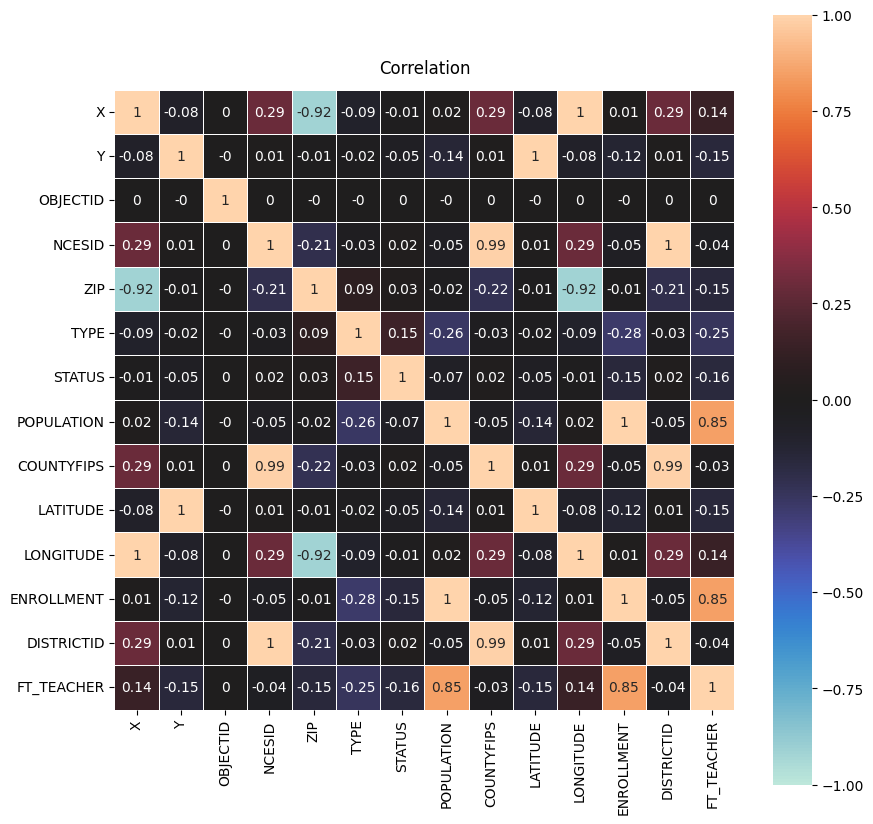

In [7]:
correlation(df)

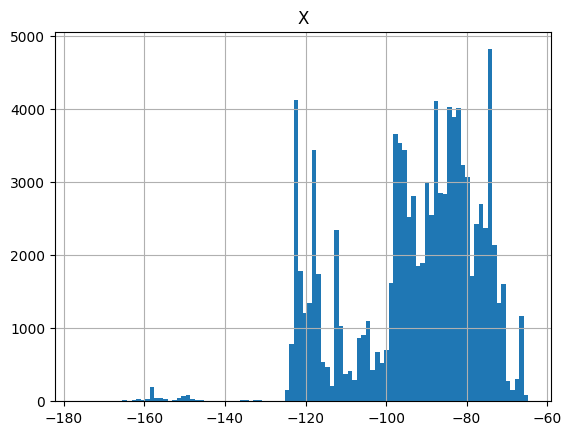

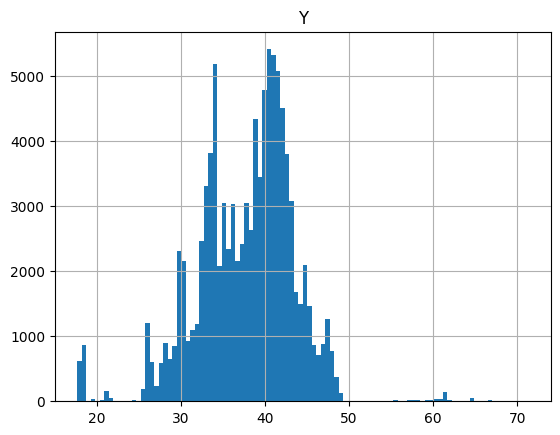

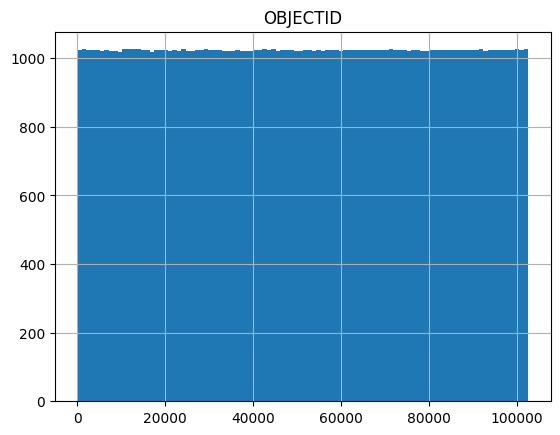

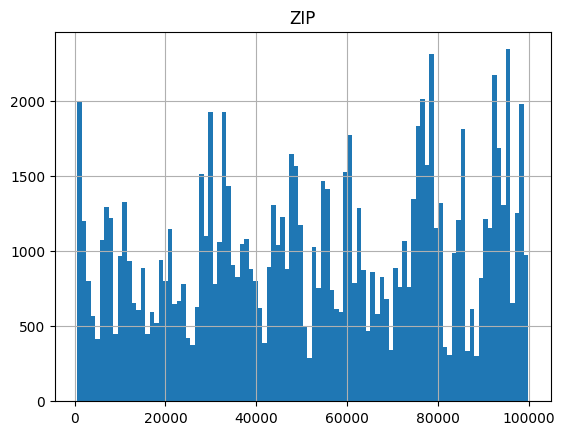

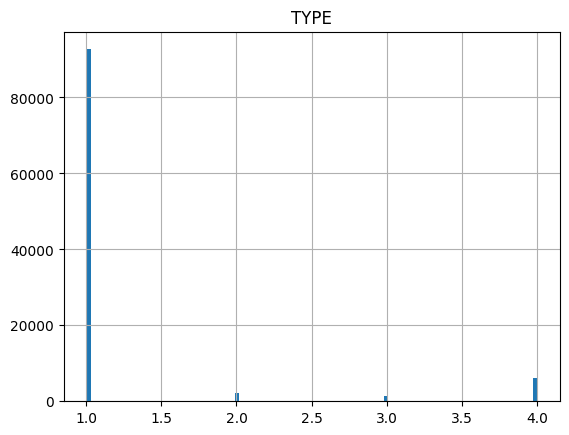

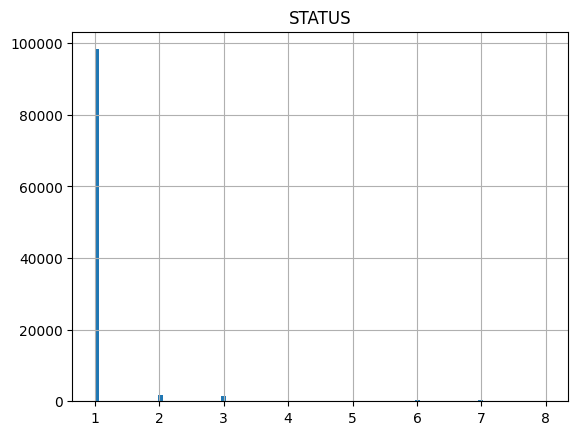

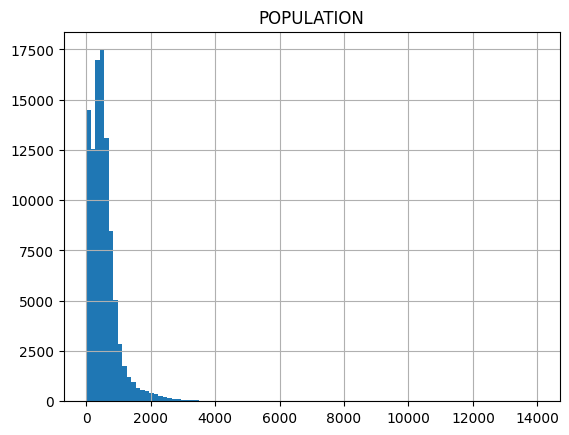

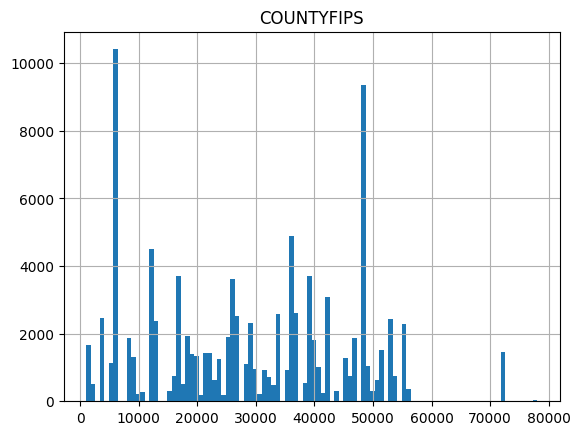

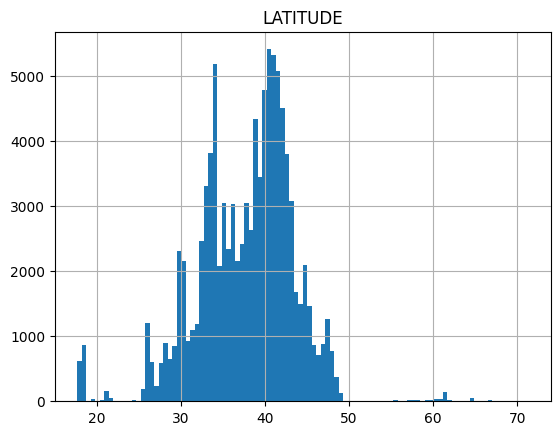

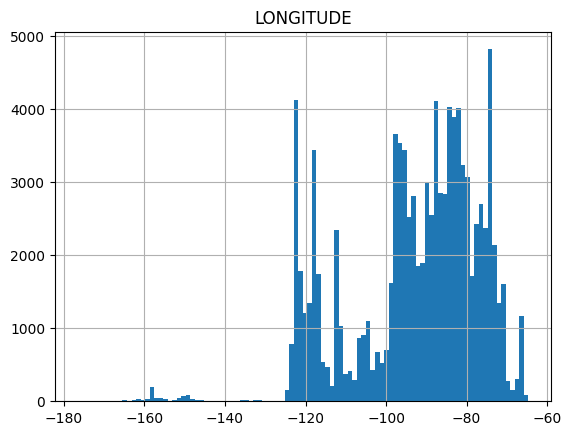

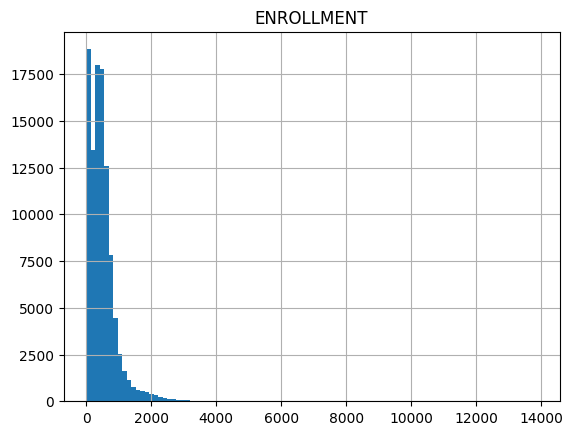

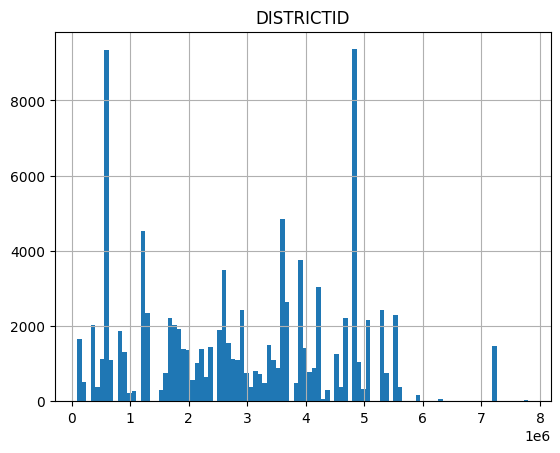

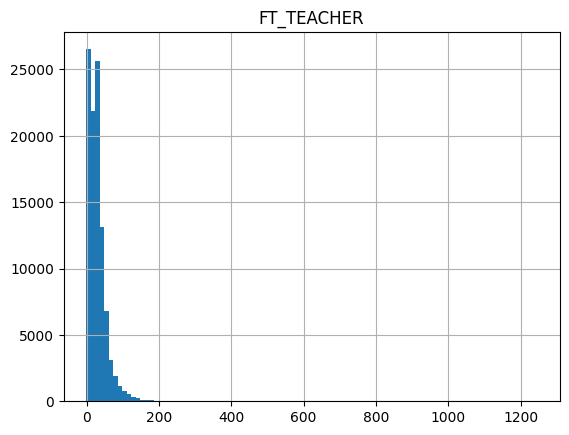

In [8]:
hist(df, bins=100)

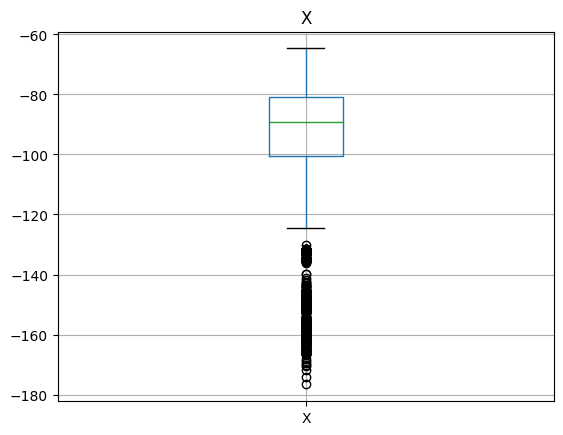

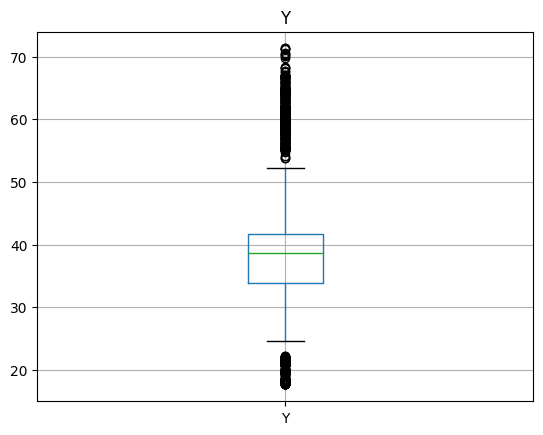

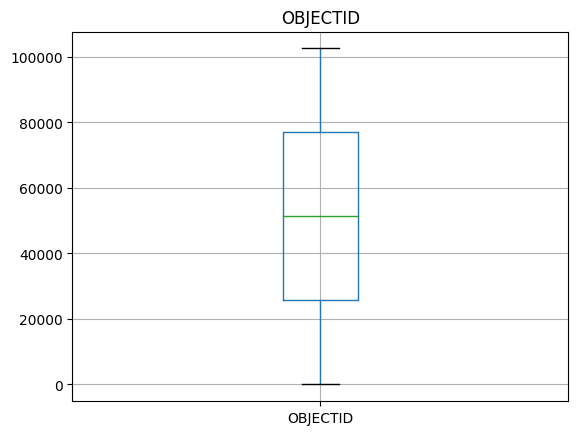

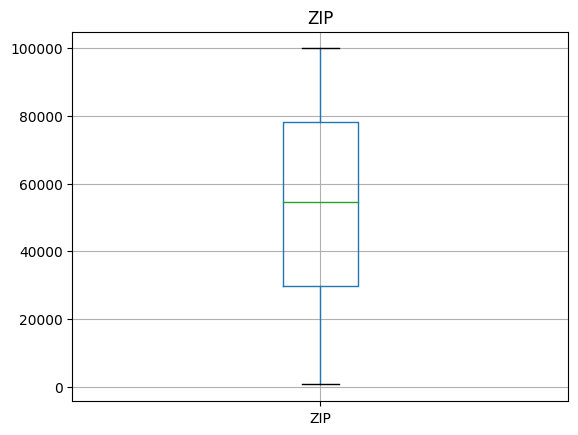

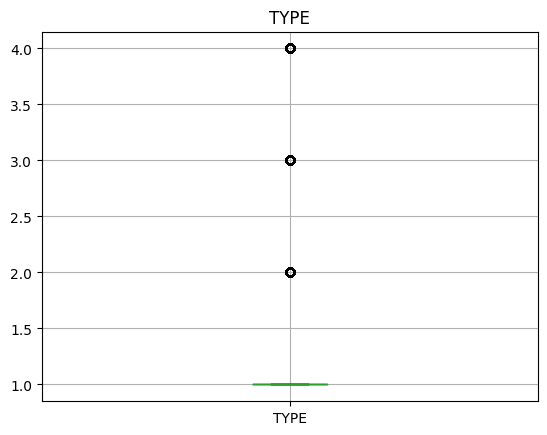

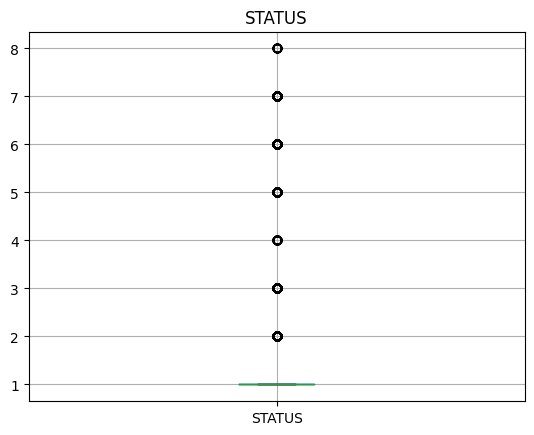

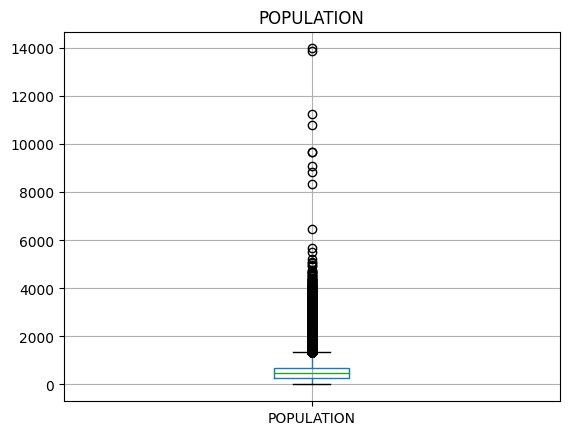

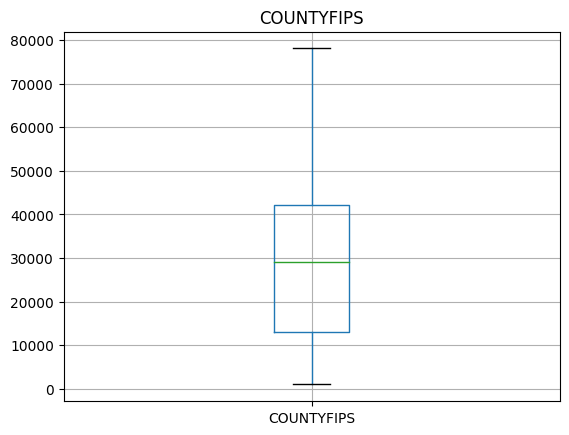

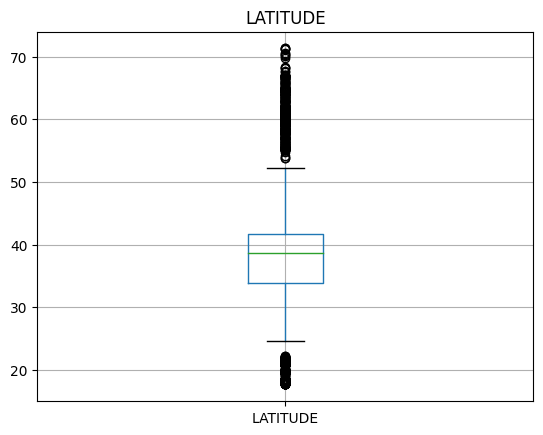

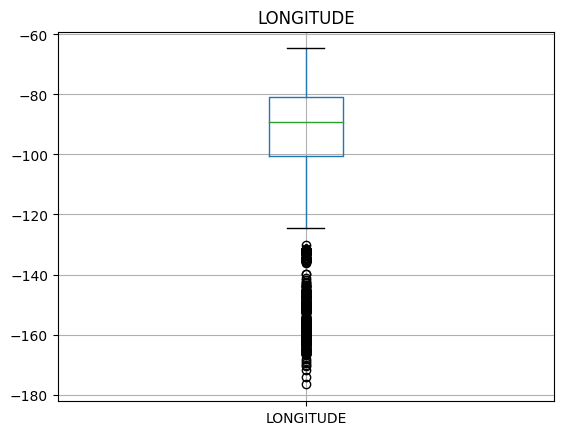

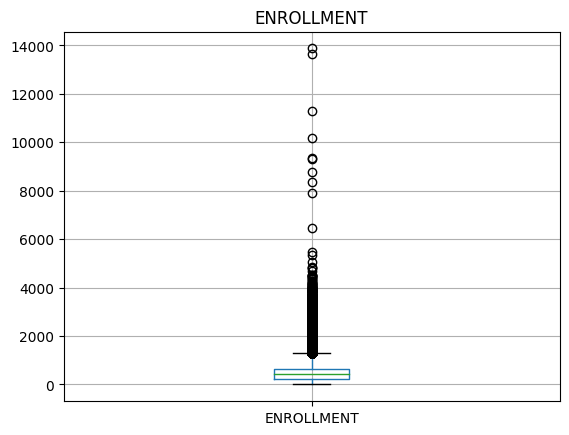

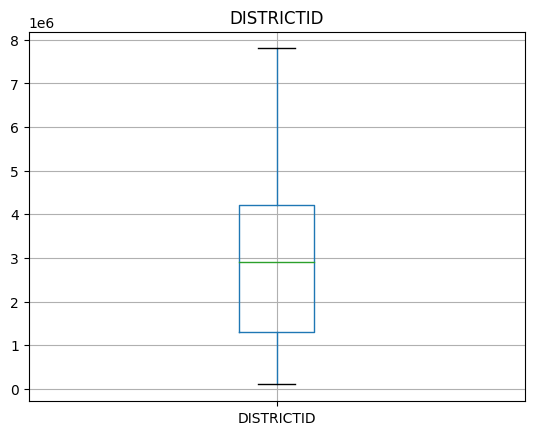

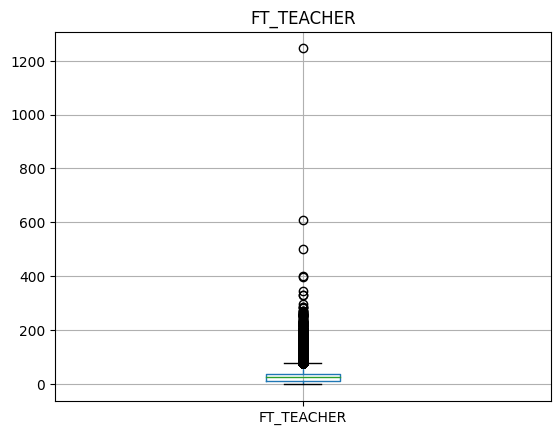

In [9]:
boxplot(df)

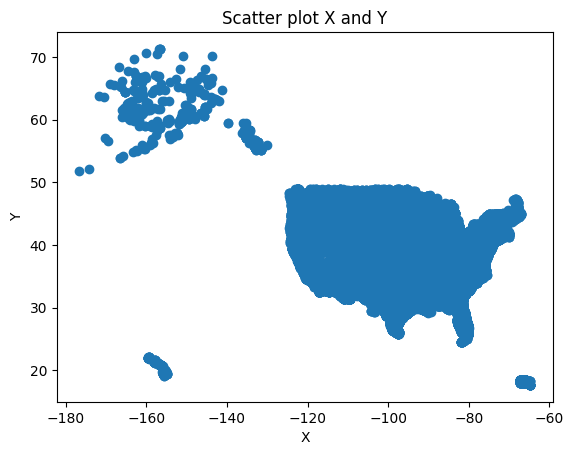

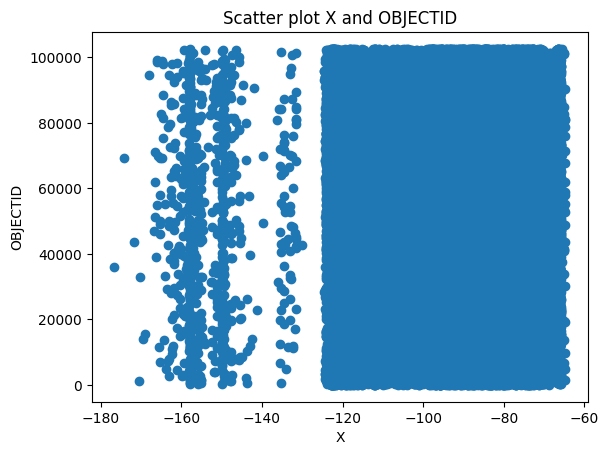

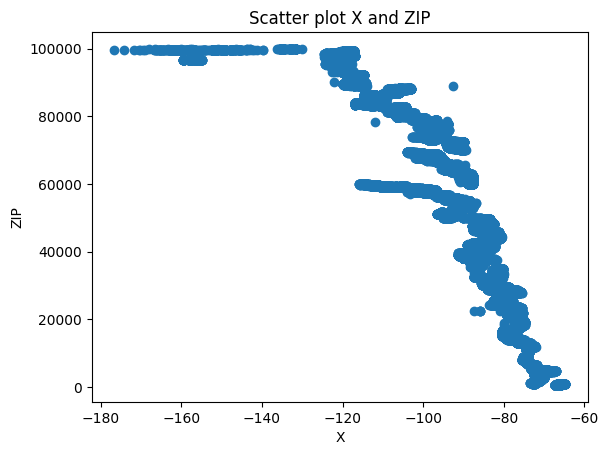

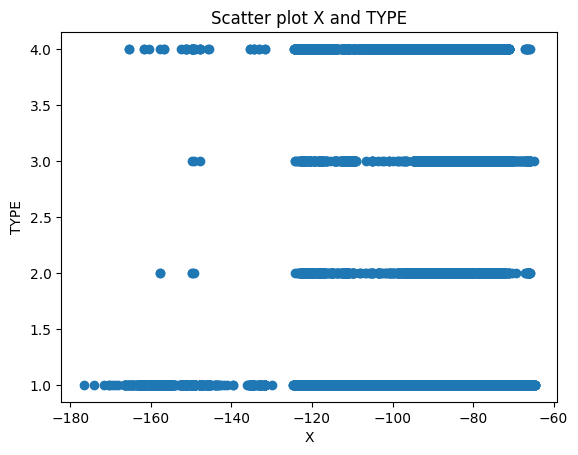

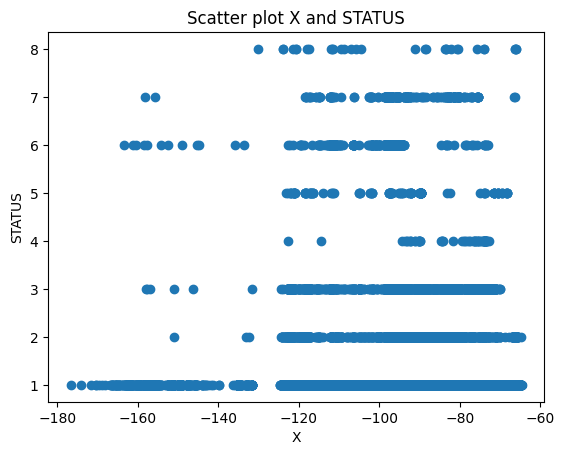

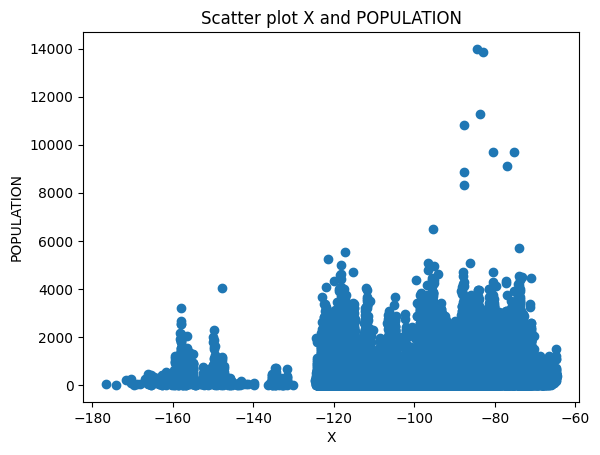

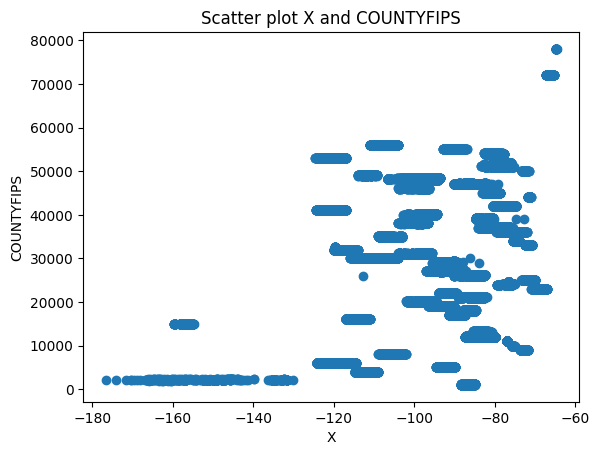

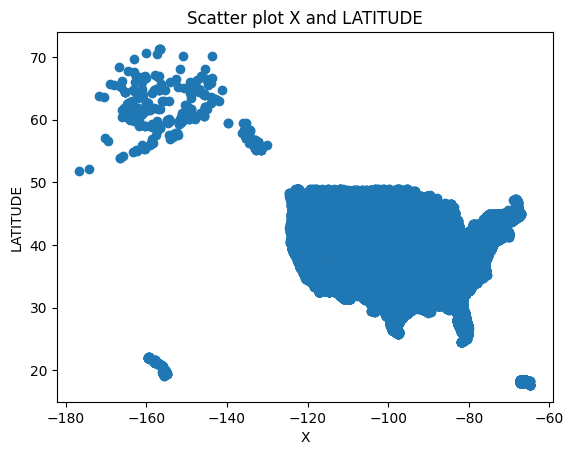

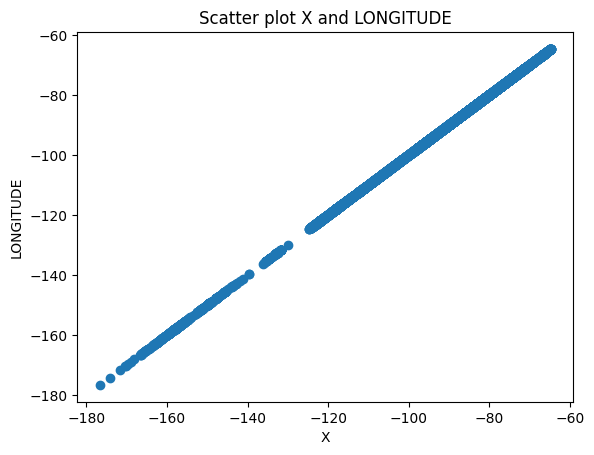

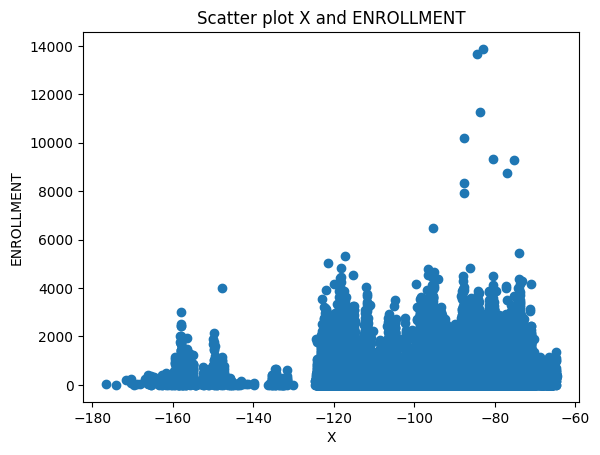

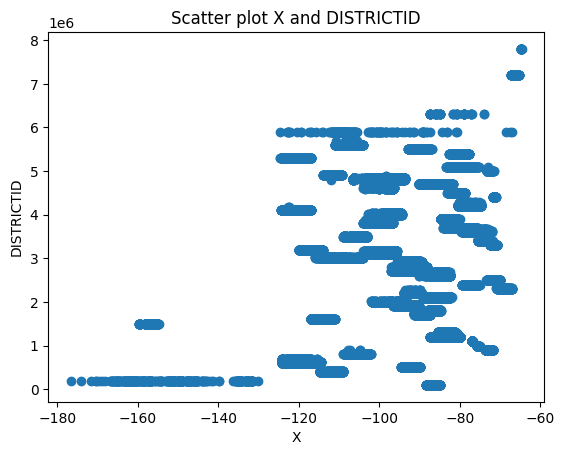

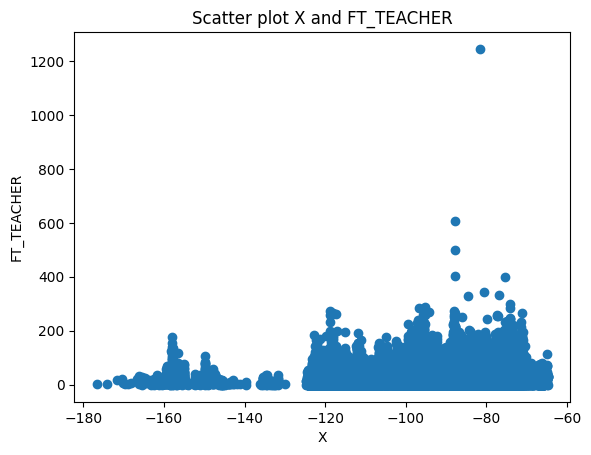

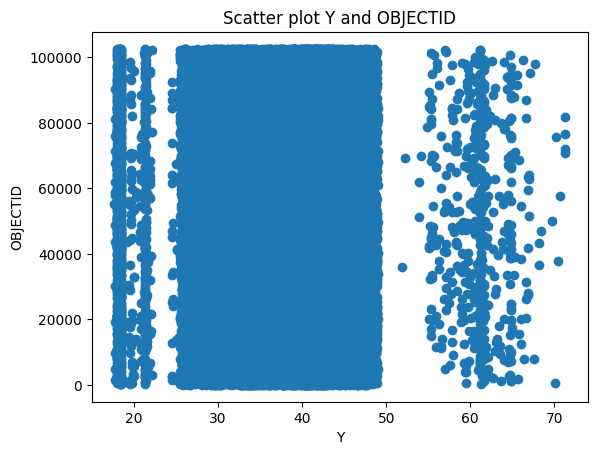

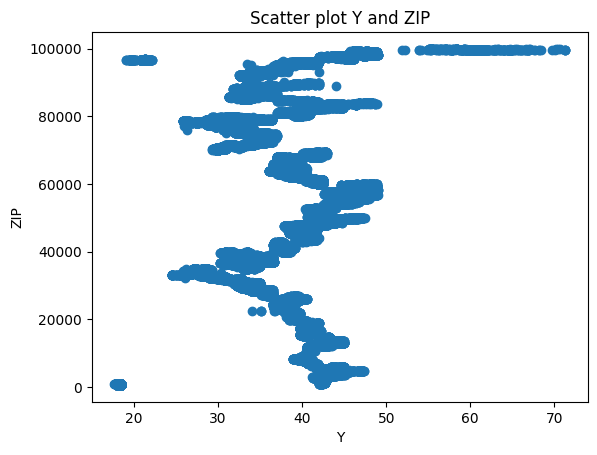

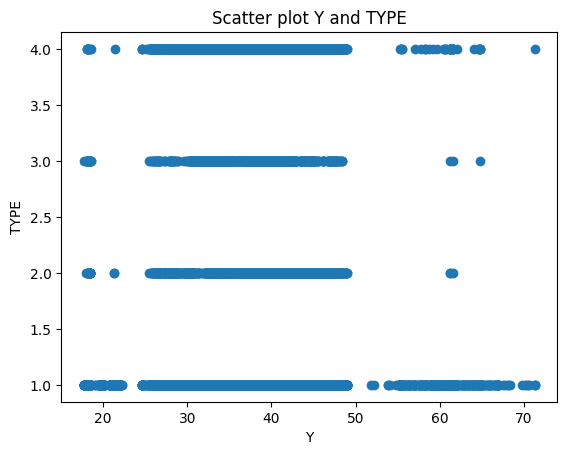

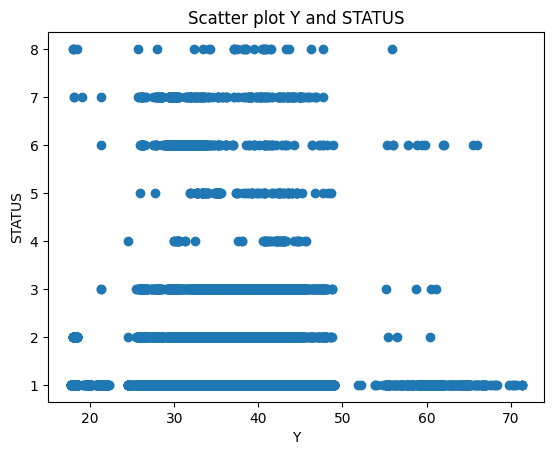

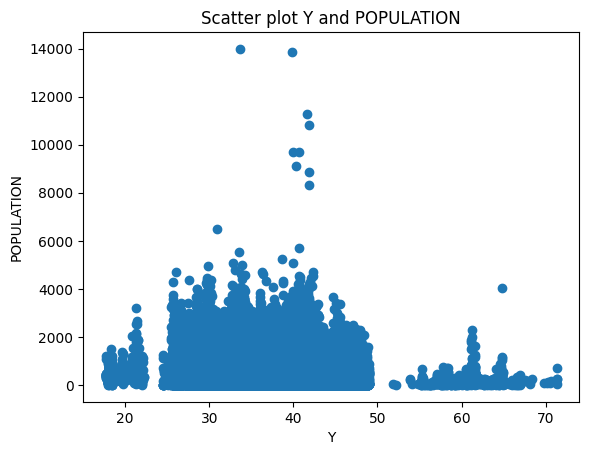

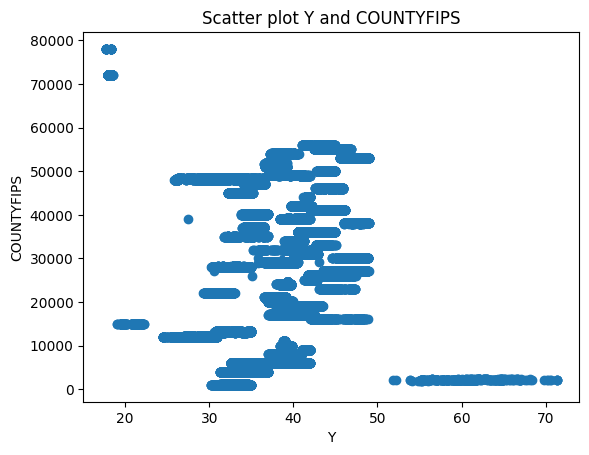

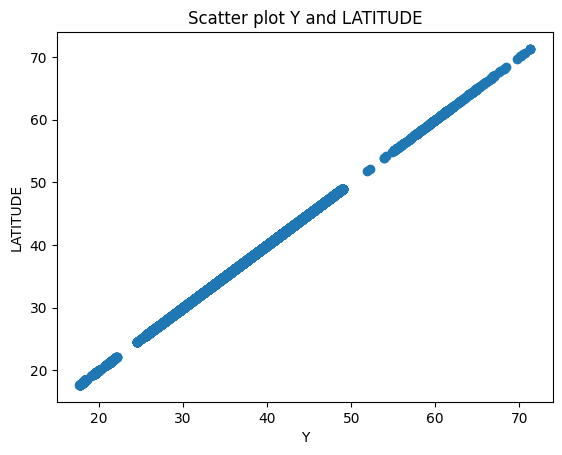

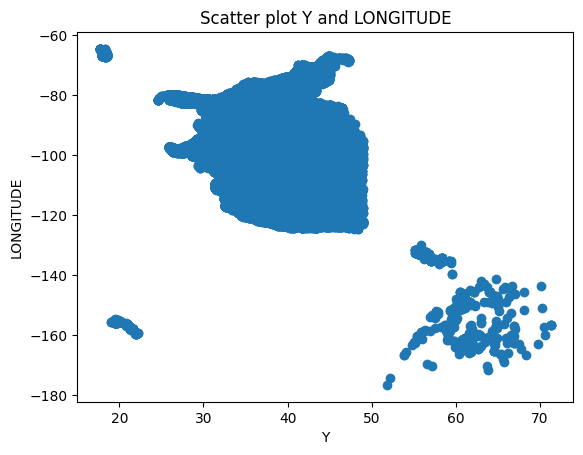

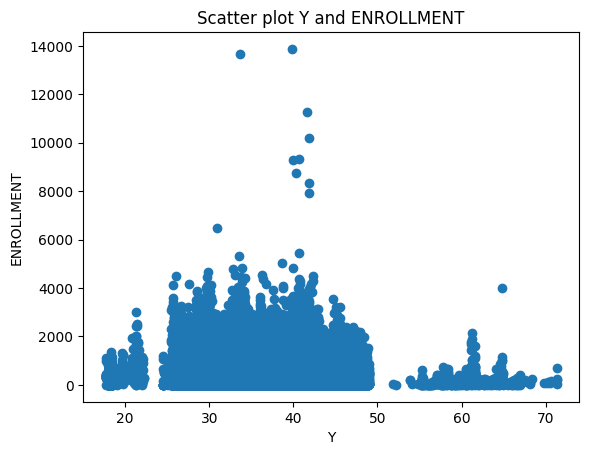

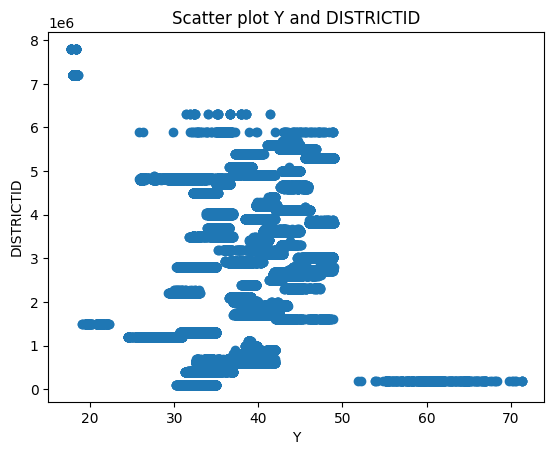

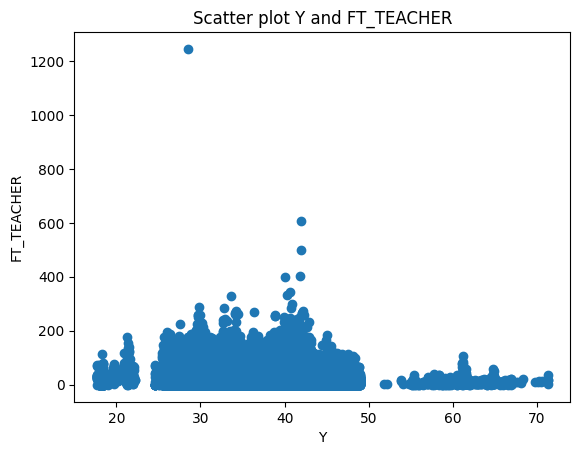

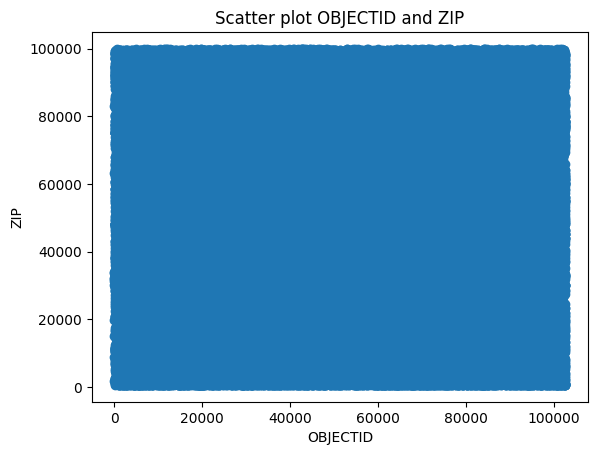

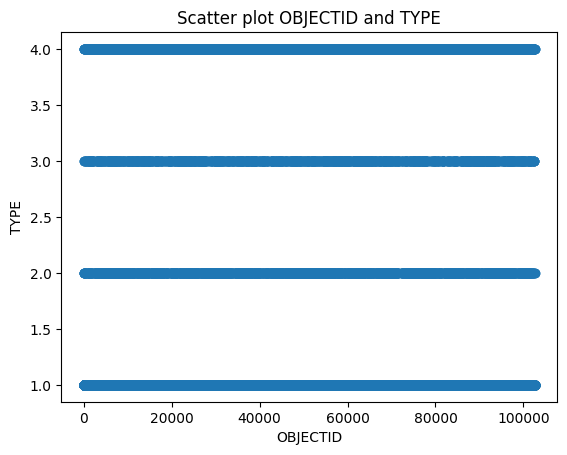

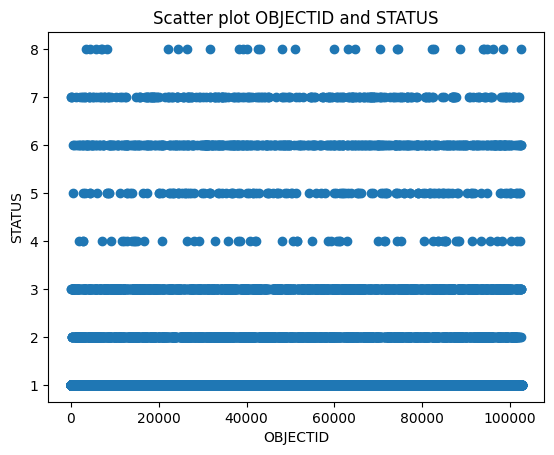

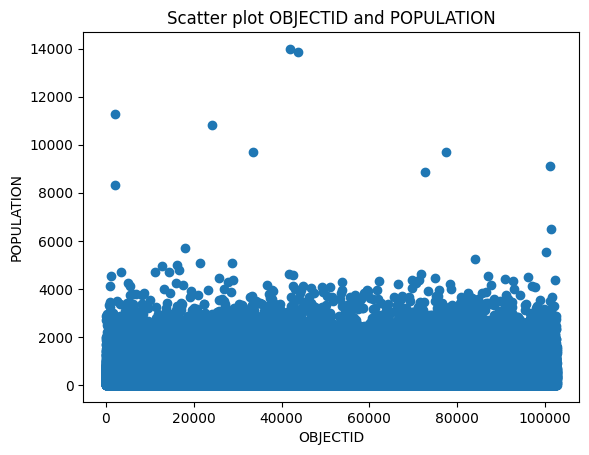

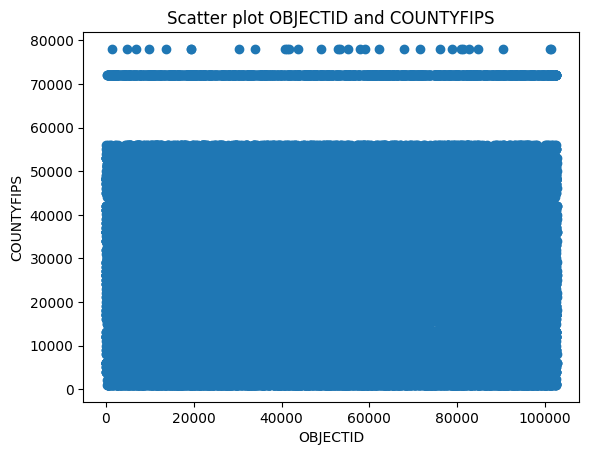

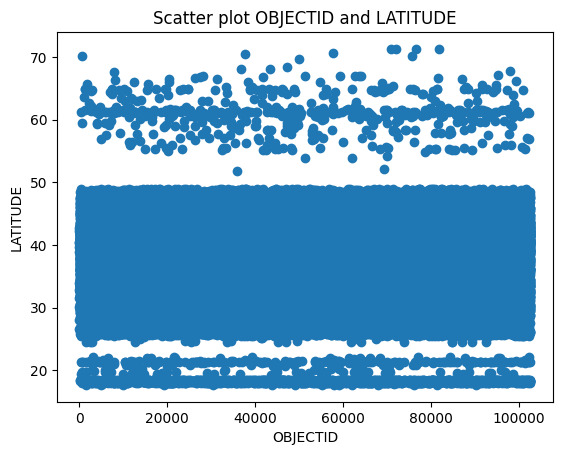

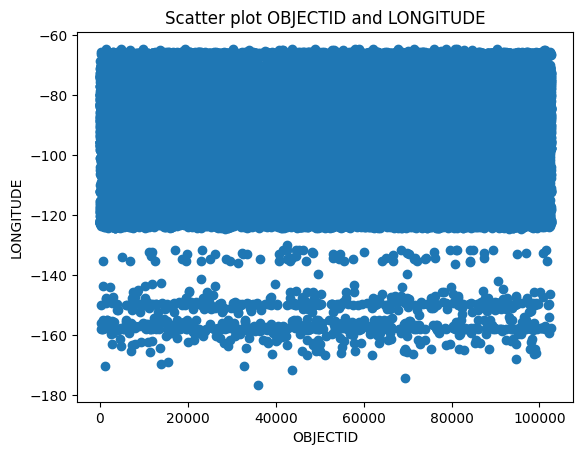

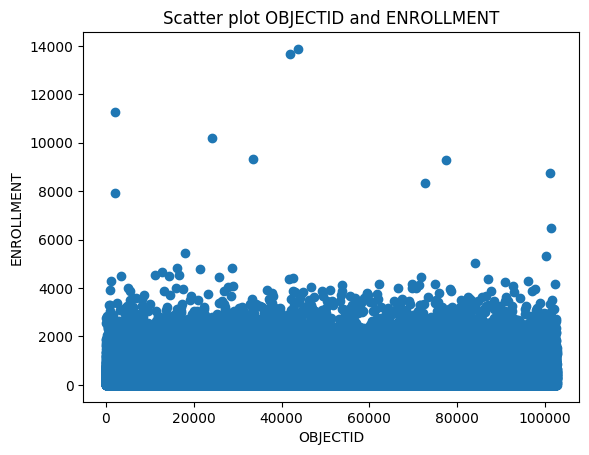

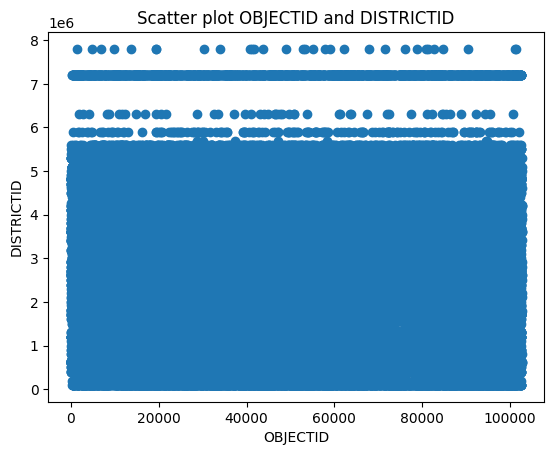

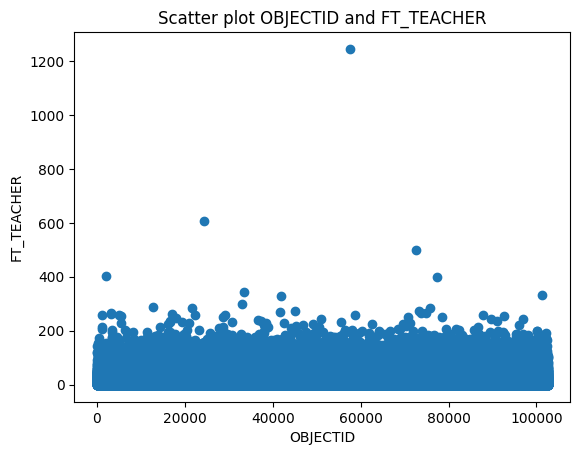

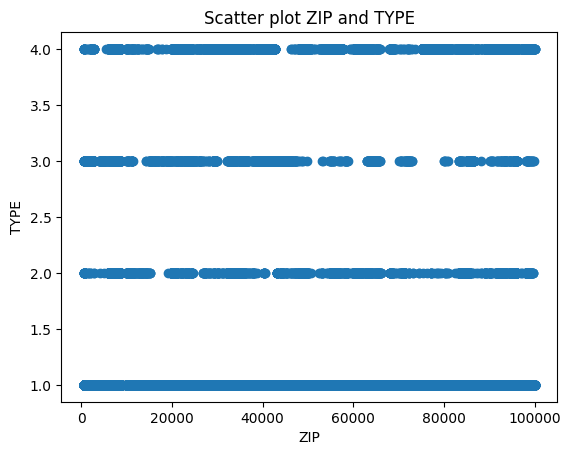

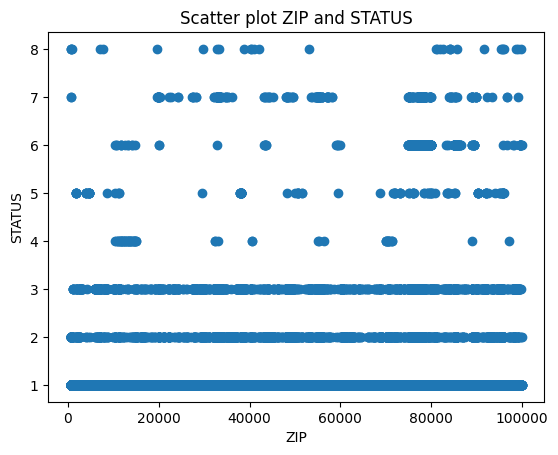

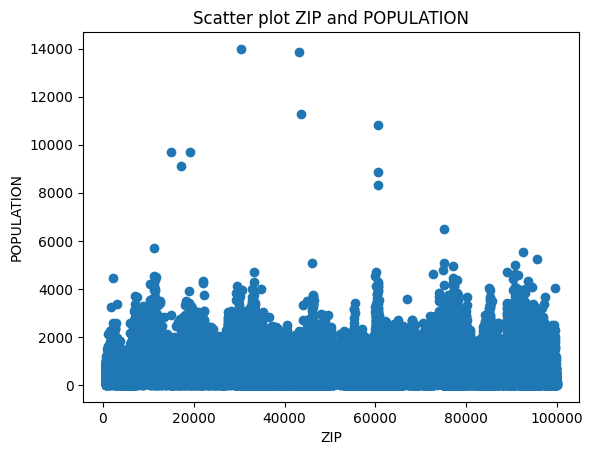

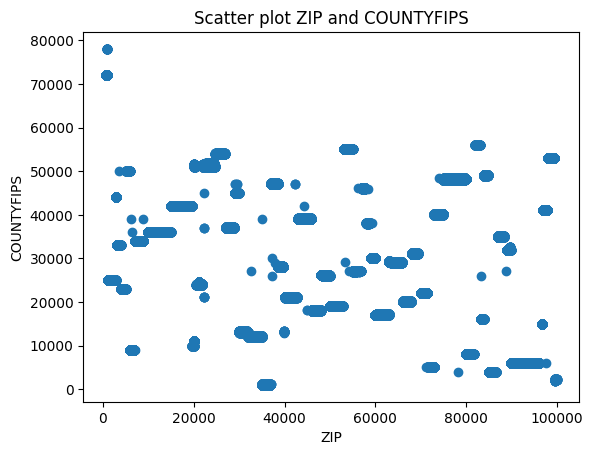

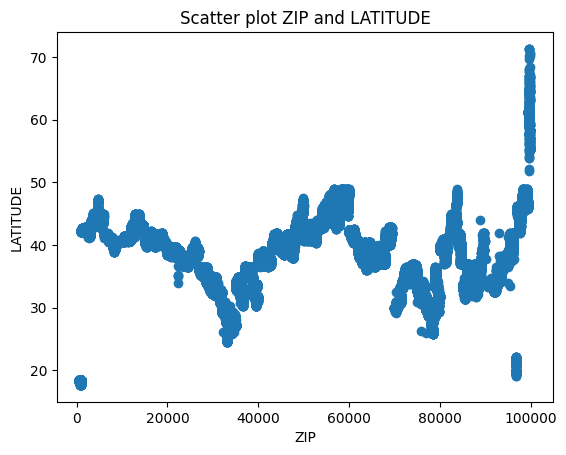

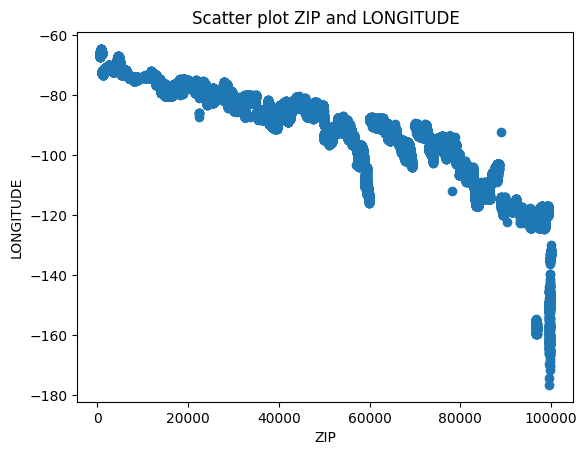

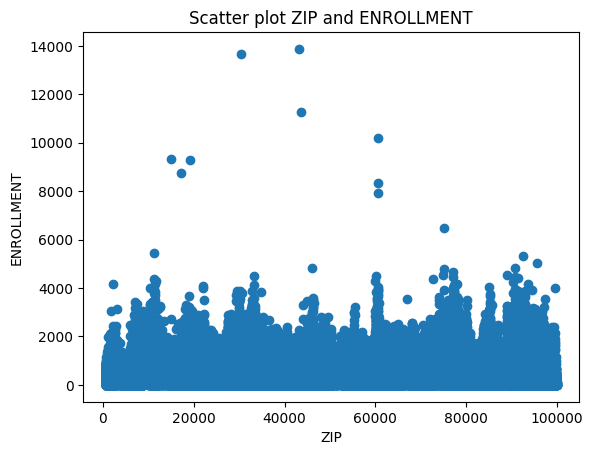

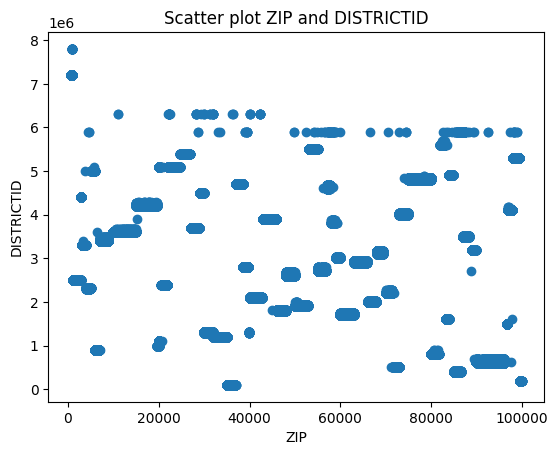

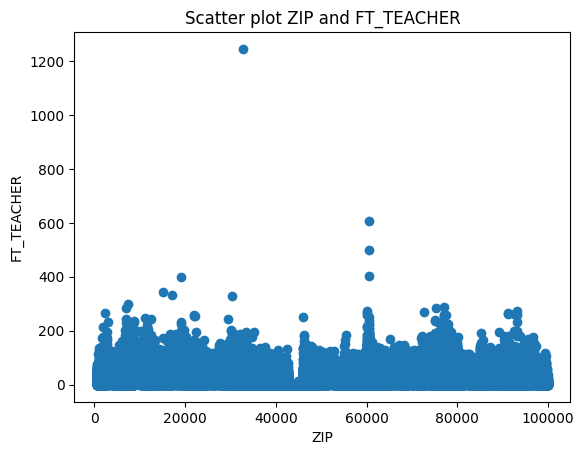

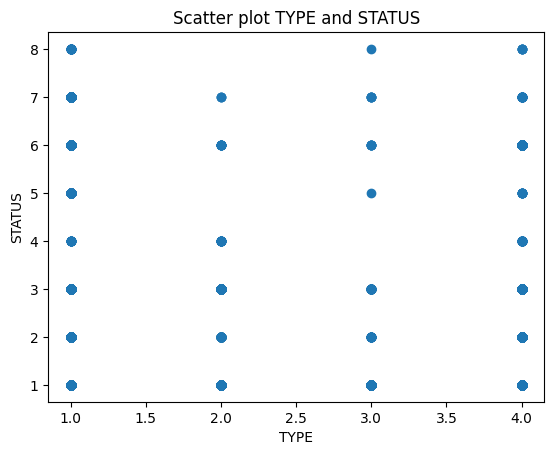

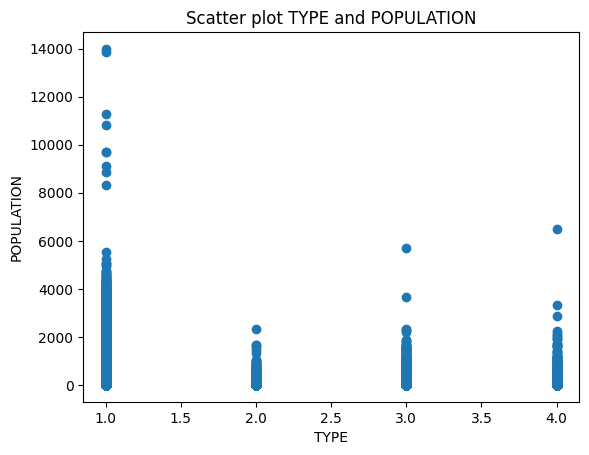

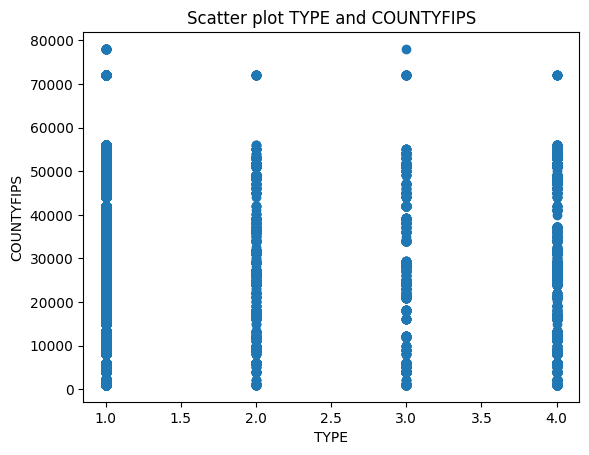

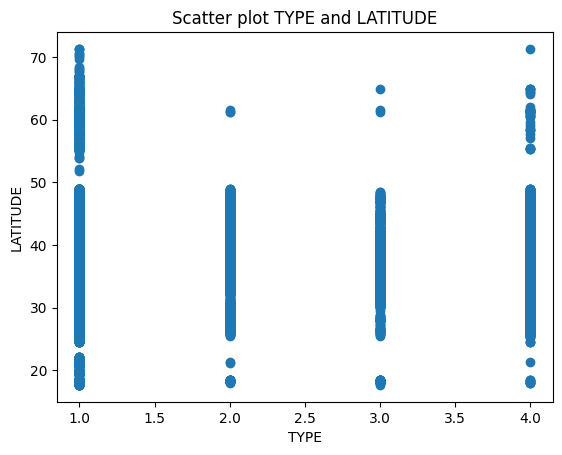

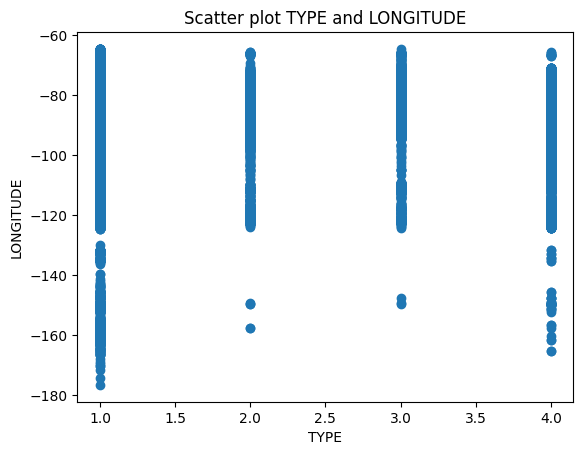

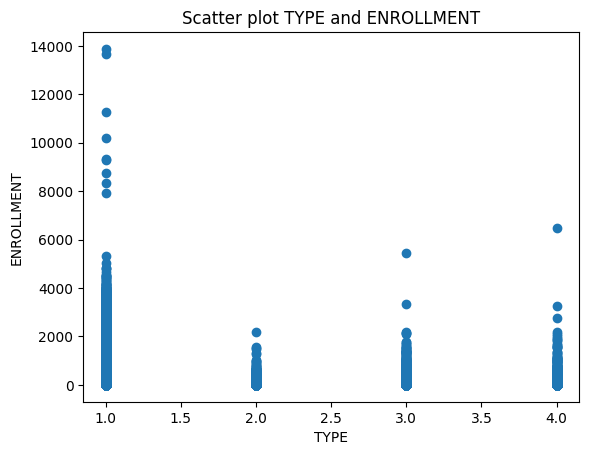

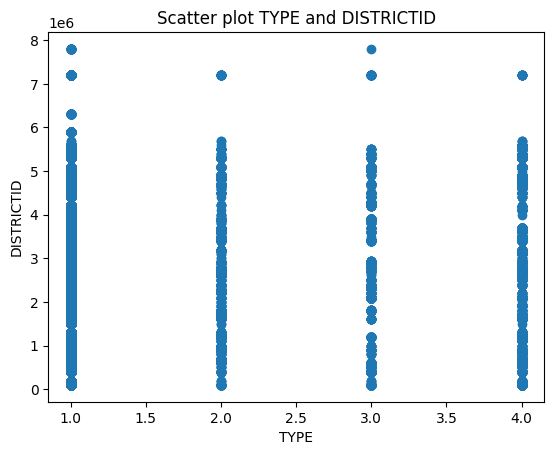

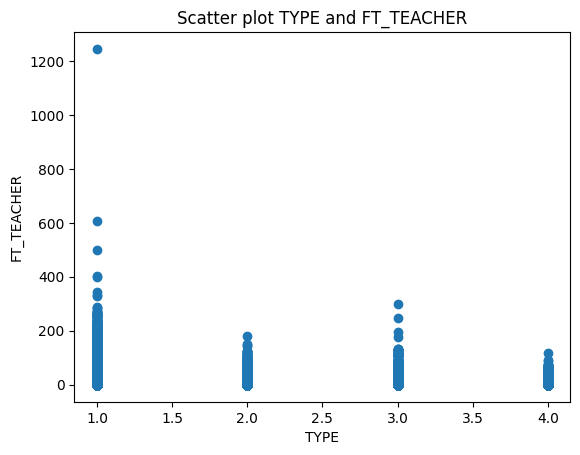

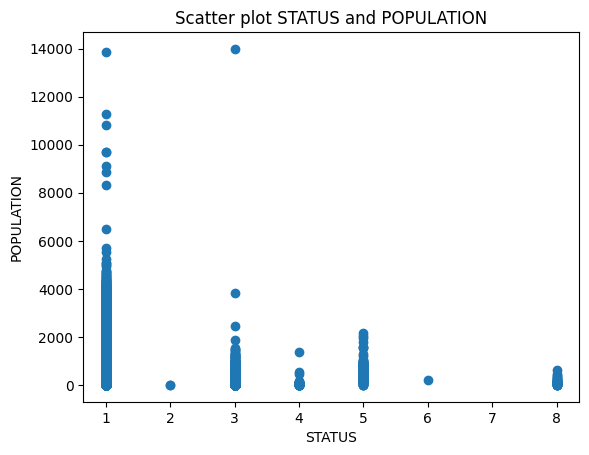

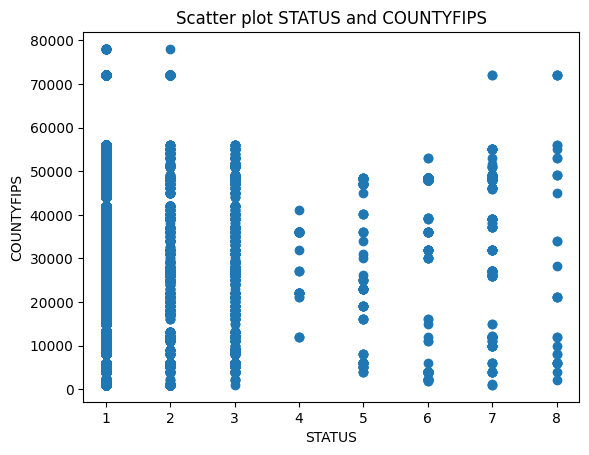

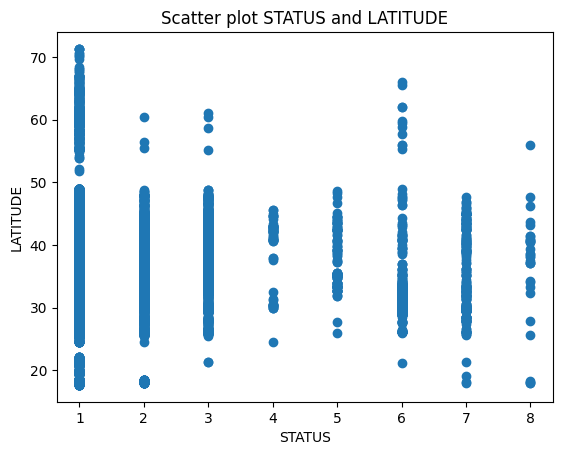

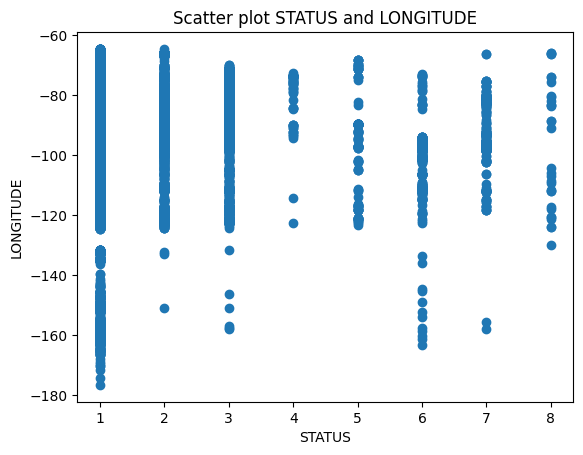

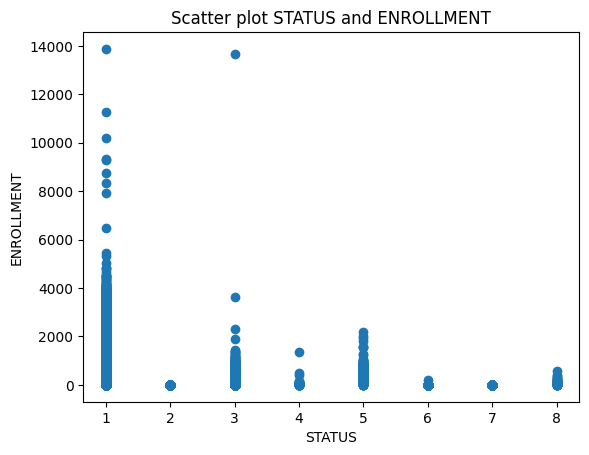

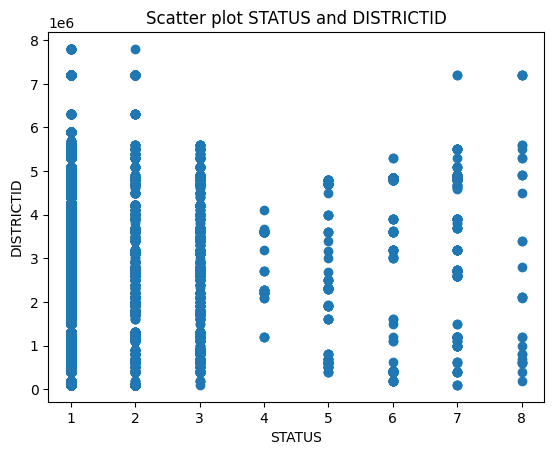

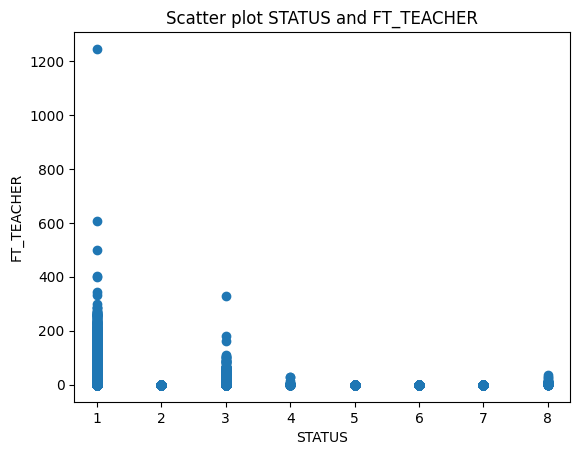

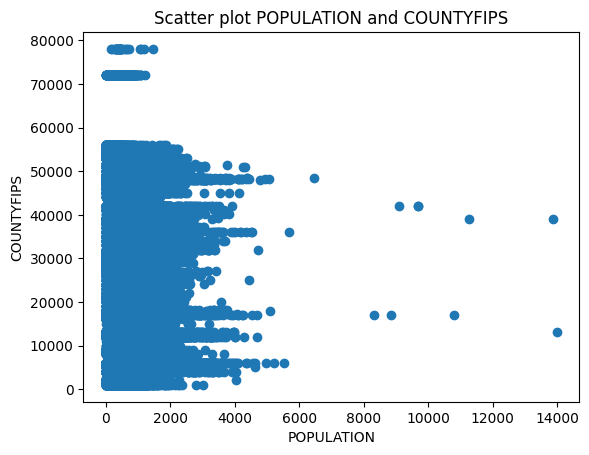

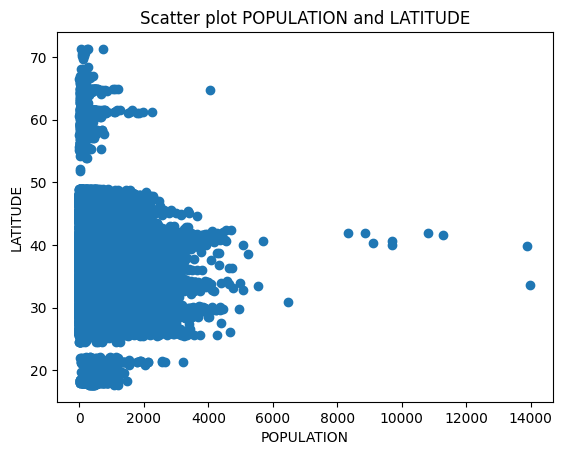

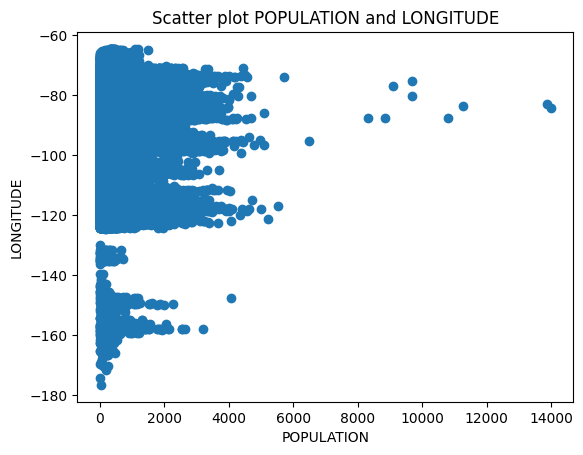

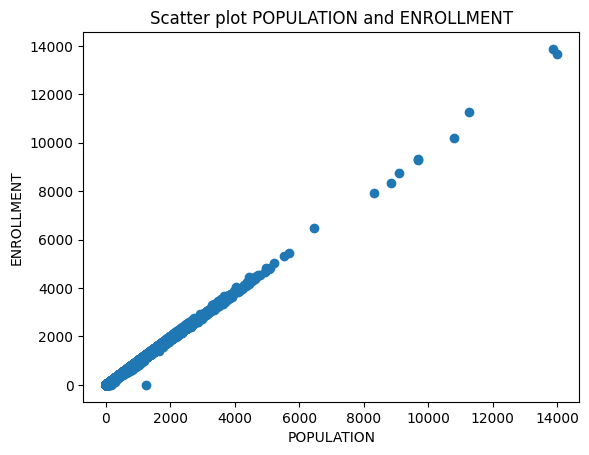

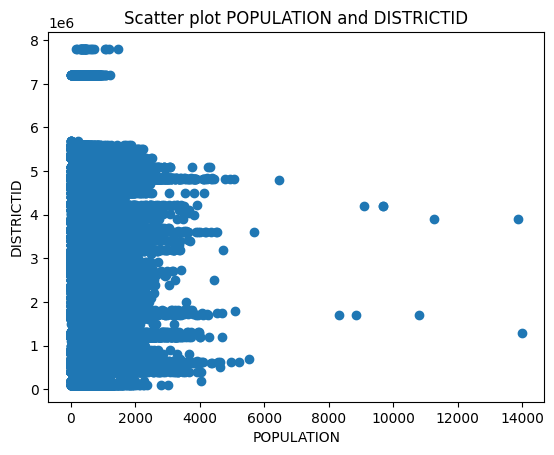

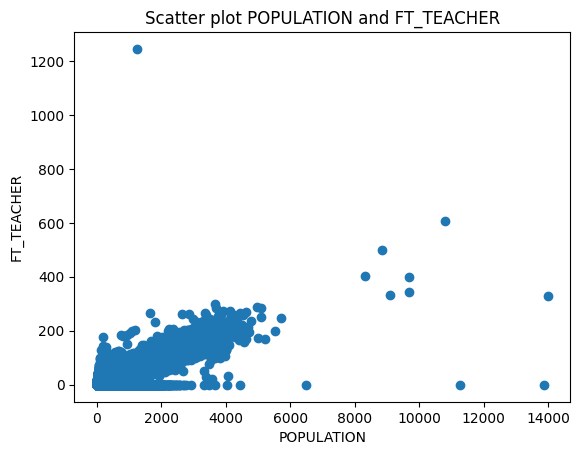

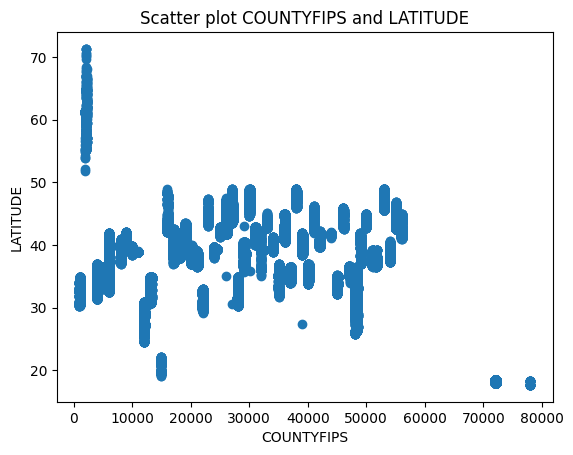

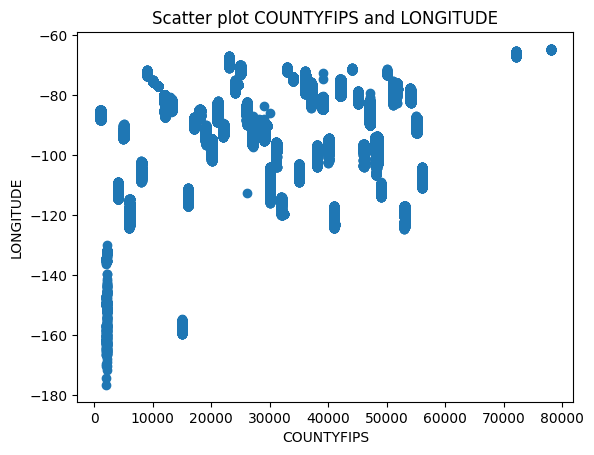

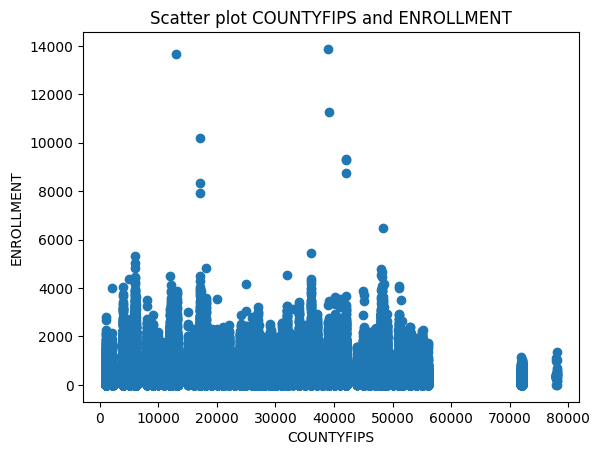

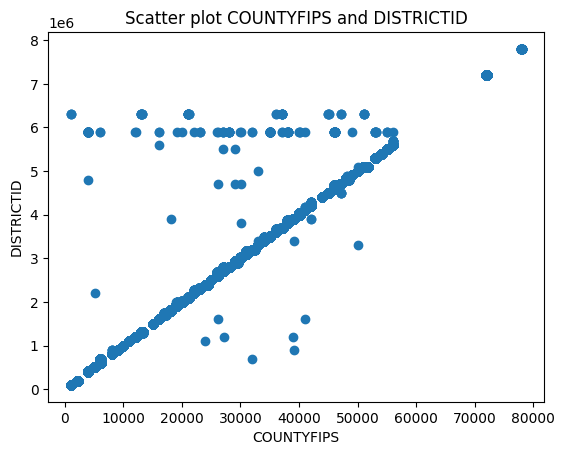

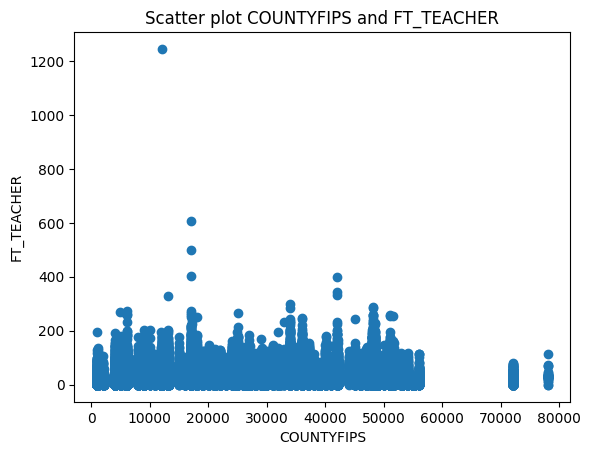

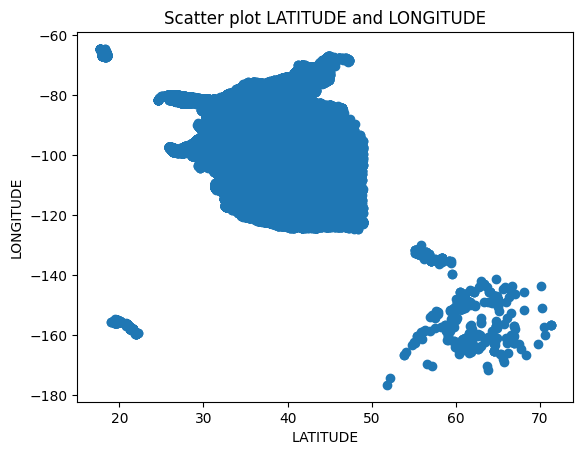

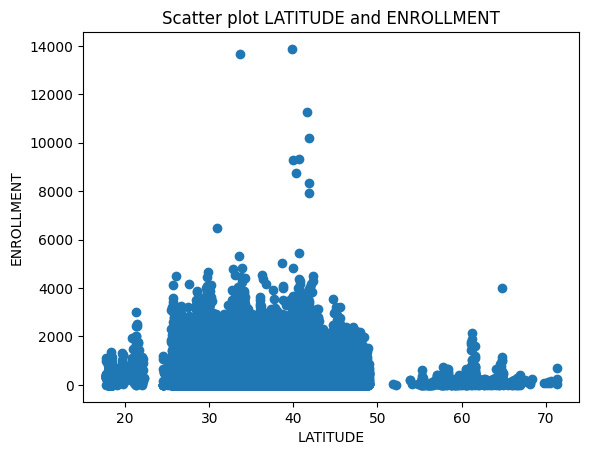

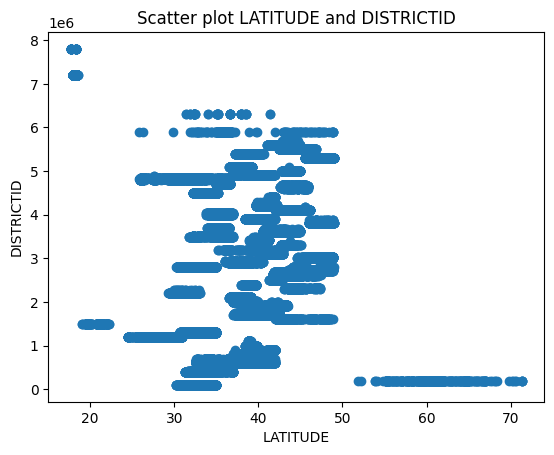

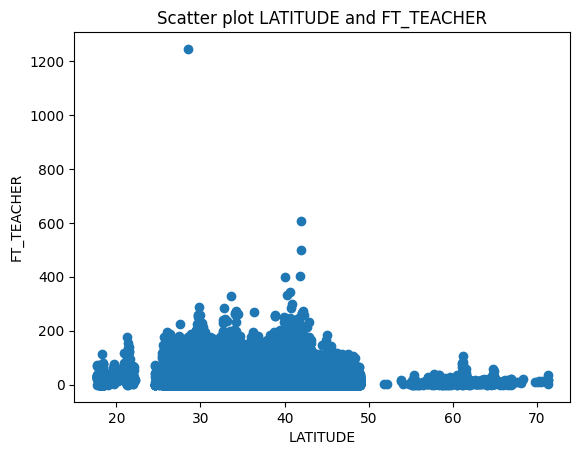

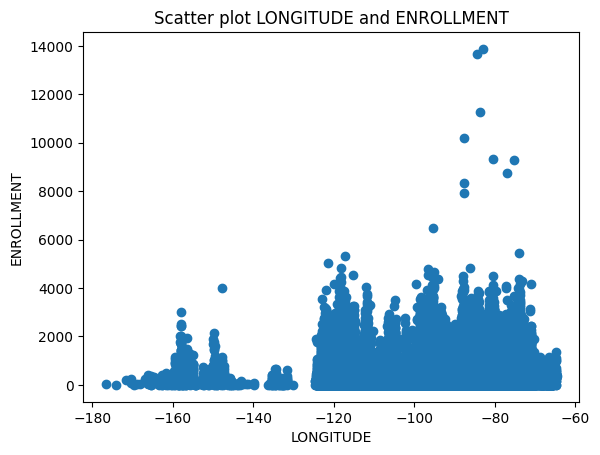

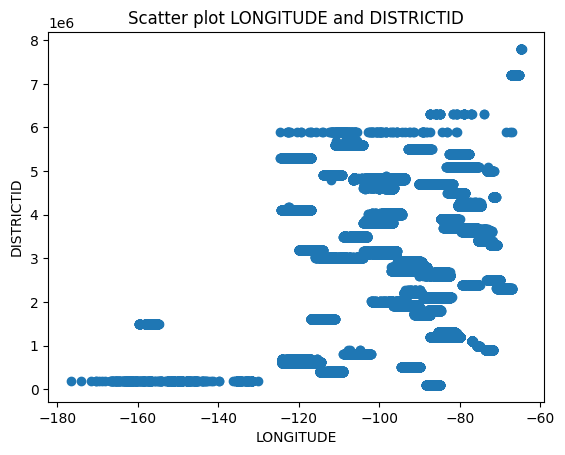

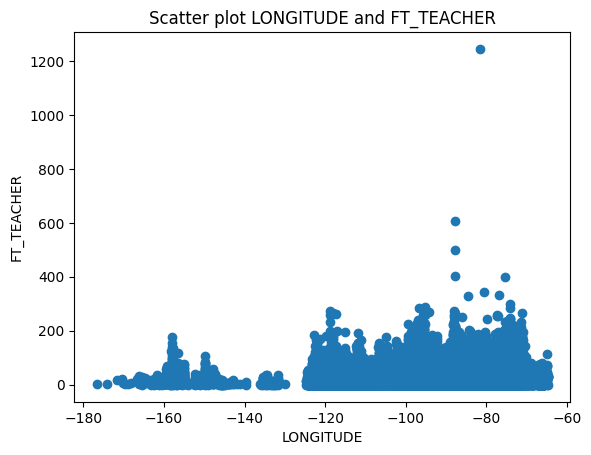

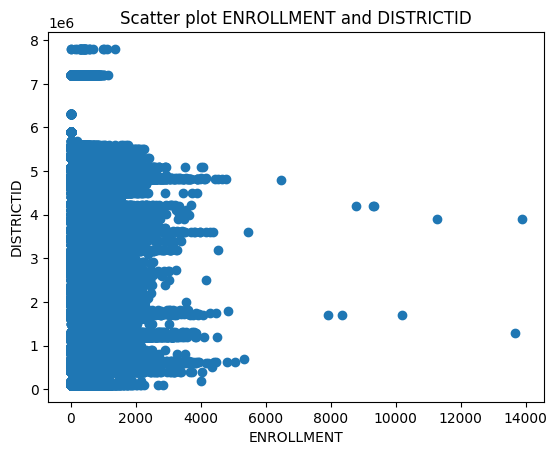

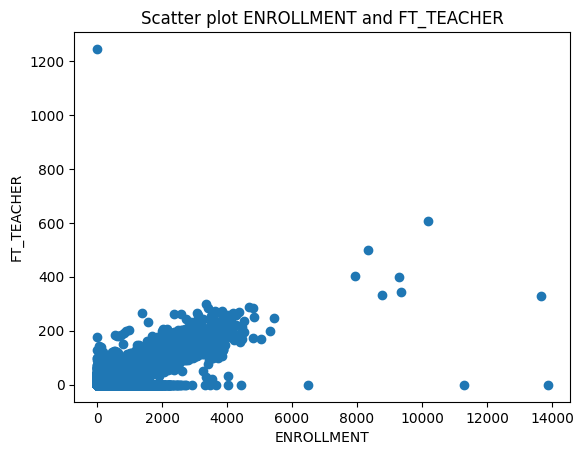

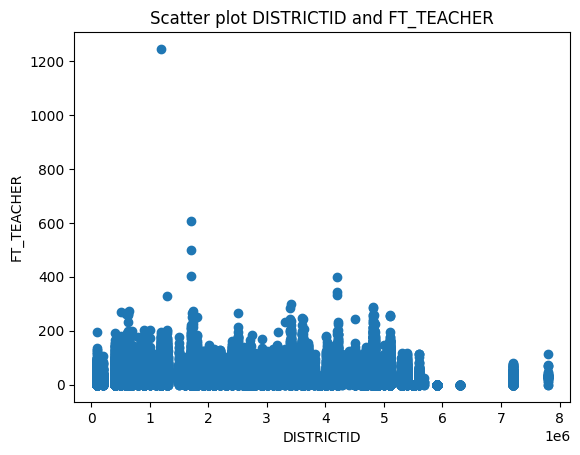

In [10]:
scatter(df)

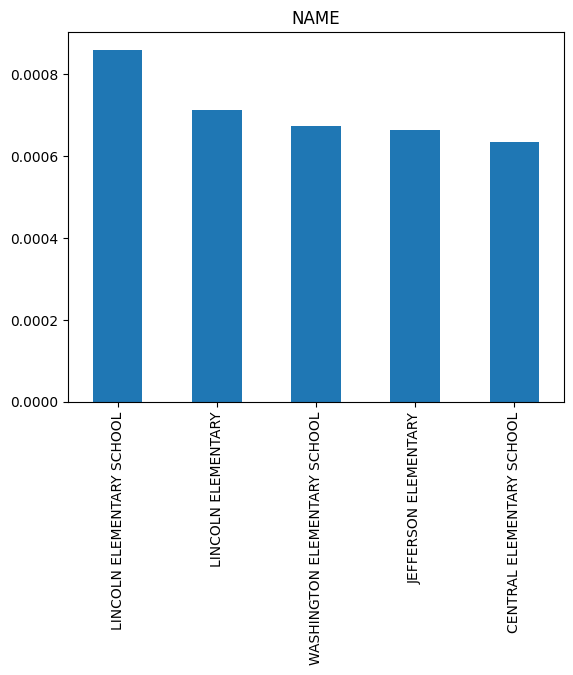

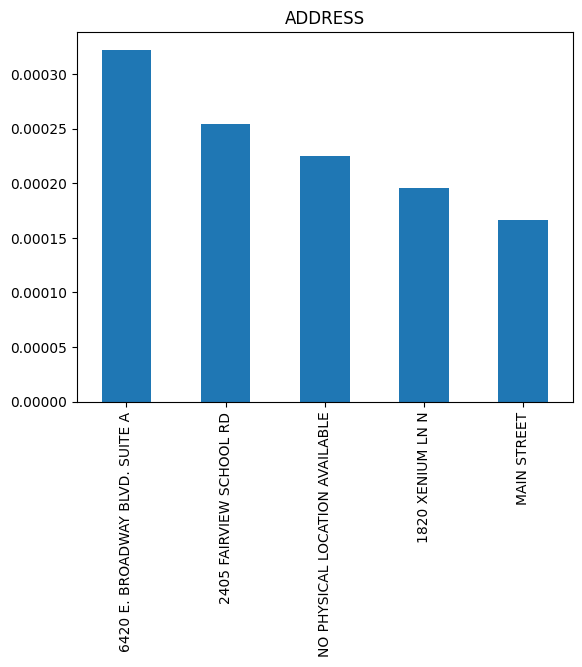

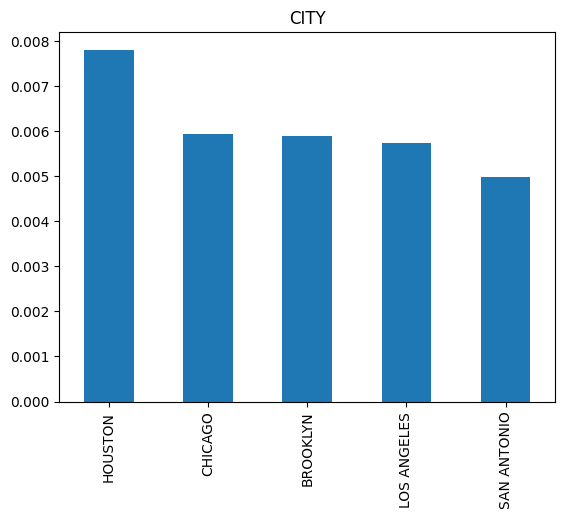

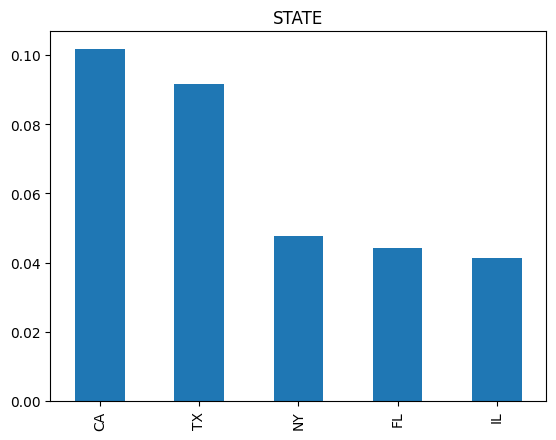

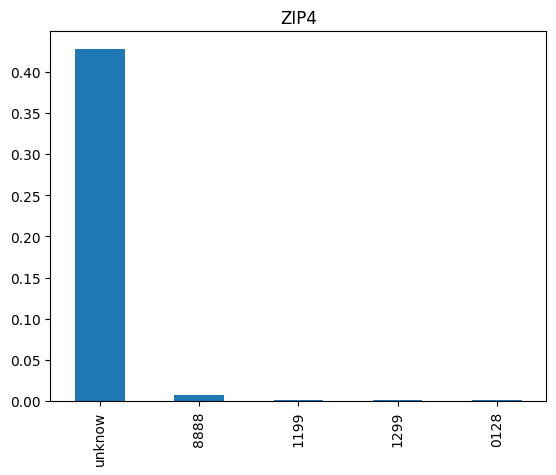

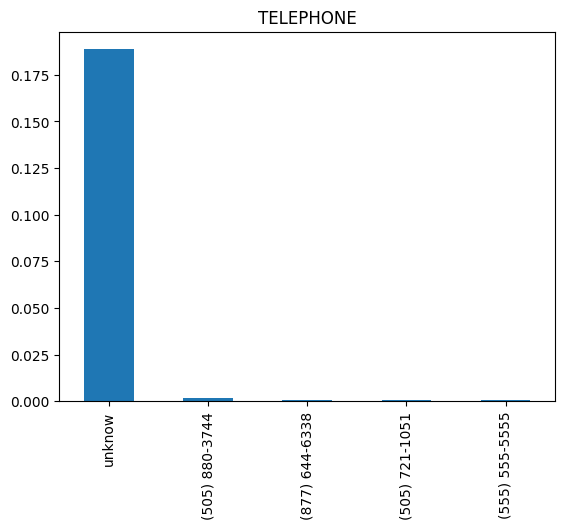

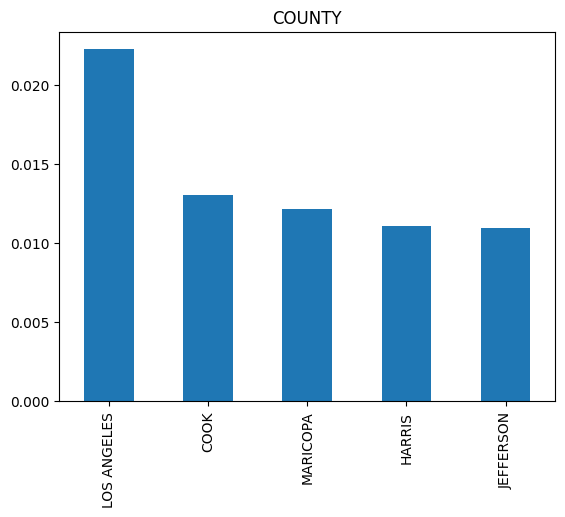

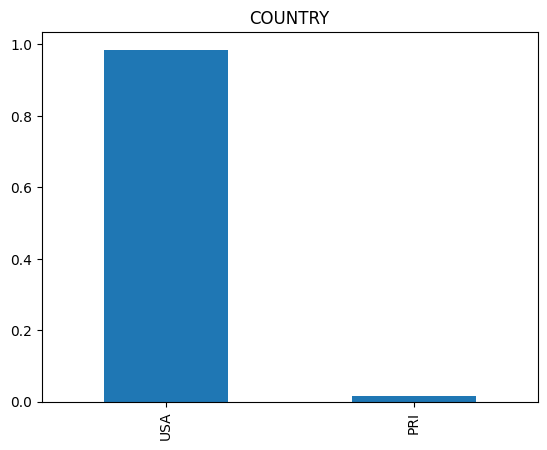

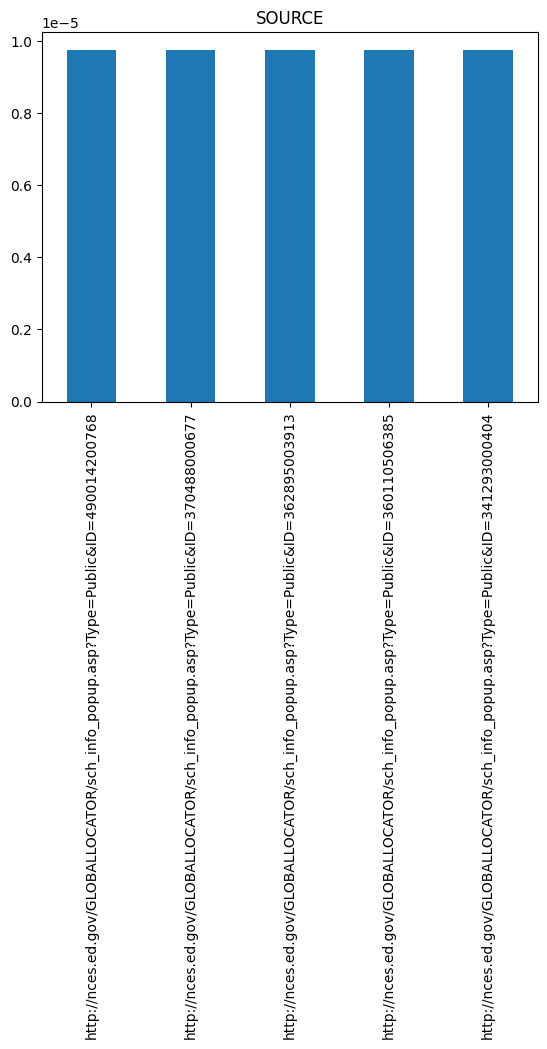

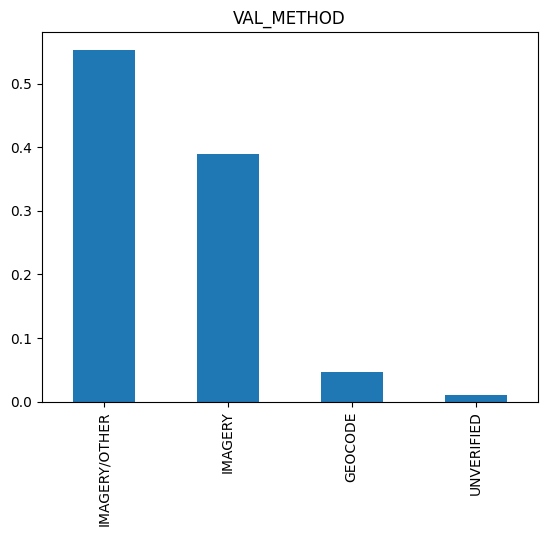

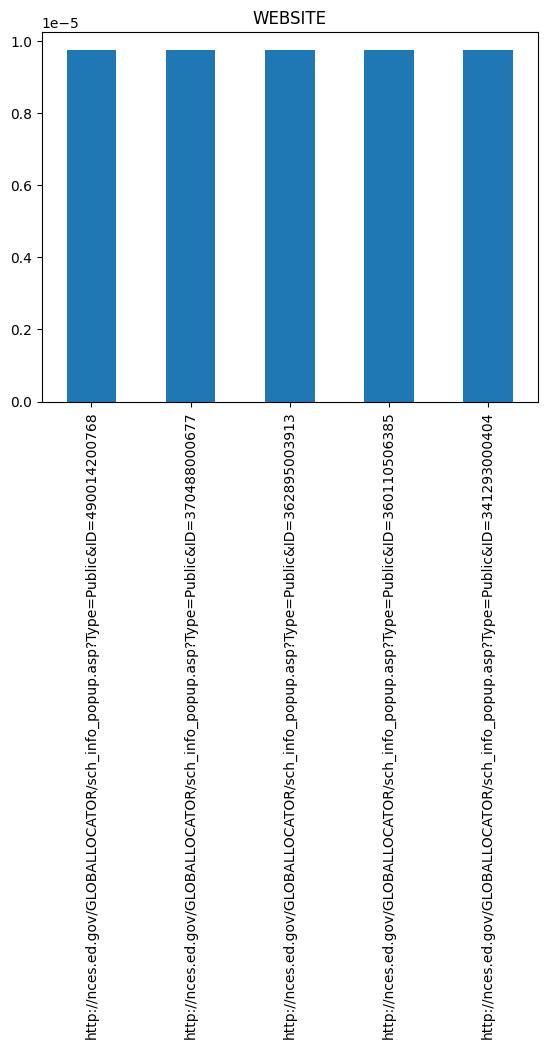

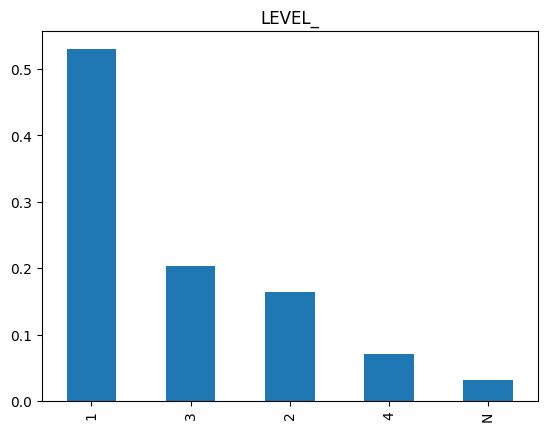

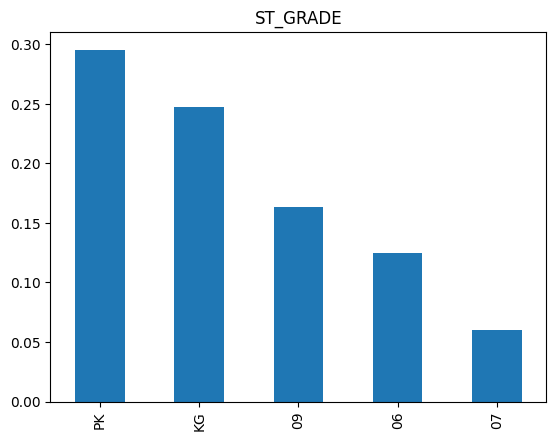

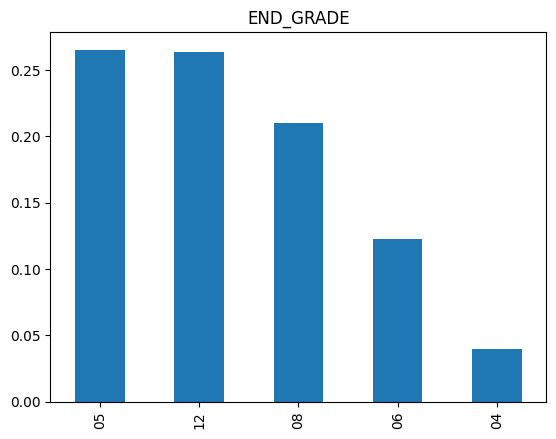

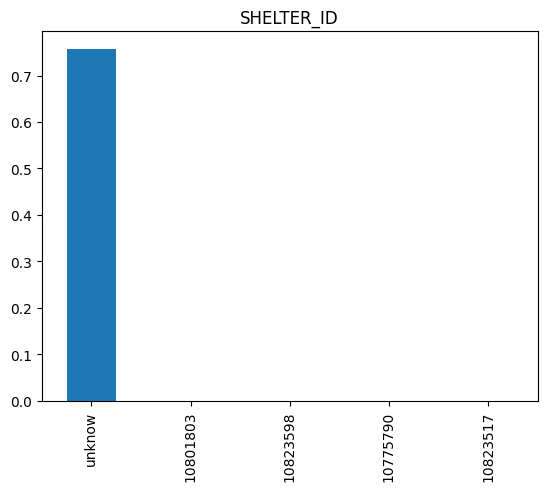

In [11]:
barplot(df,top=5,freq=True)